<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/DL_lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image segmentation using SegNet**

**SegNet:**

Encoder-Decoder Architecture: SegNet, short for "Segmentation Network," follows an encoder-decoder architecture.


**Encoder**: The encoder in SegNet downsamples the input image to extract high-level features. It typically uses convolutional layers and pooling to reduce spatial dimensions while increasing the number of channels.


**Decoder**: The decoder in SegNet takes the encoded feature map and performs upsampling. It uses pooling indices from the encoder to upsample the feature map in a manner that helps in maintaining spatial information.


**Max-Pooling Indices**: A distinctive feature of SegNet is that it uses the max-pooling indices obtained from the encoder during downsampling to guide the upsampling process in the decoder.


**Applications:** SegNet is often used in tasks that require fine segmentation, such as medical image analysis and autonomous driving for road scene understanding.

Epoch 1/10
3/3 [==============================] - 13s 4s/step - loss: 0.8710 - val_loss: 0.6933
Epoch 2/10
3/3 [==============================] - 12s 4s/step - loss: 0.7859 - val_loss: 0.6933
Epoch 3/10
3/3 [==============================] - 12s 4s/step - loss: 0.7409 - val_loss: 0.6932
Epoch 4/10
3/3 [==============================] - 12s 4s/step - loss: 0.7175 - val_loss: 0.6932
Epoch 5/10
3/3 [==============================] - 12s 4s/step - loss: 0.7076 - val_loss: 0.6933
Epoch 6/10
3/3 [==============================] - 12s 4s/step - loss: 0.7019 - val_loss: 0.6932
Epoch 7/10
3/3 [==============================] - 12s 4s/step - loss: 0.6987 - val_loss: 0.6936
Epoch 8/10
3/3 [==============================] - 12s 4s/step - loss: 0.6967 - val_loss: 0.6935
Epoch 9/10
3/3 [==============================] - 12s 4s/step - loss: 0.6955 - val_loss: 0.6935
Epoch 10/10
1/1 [==============================] - 1s 758ms/step - loss: 0.6934
Validation Loss: 0.6934
1/1 [===========================

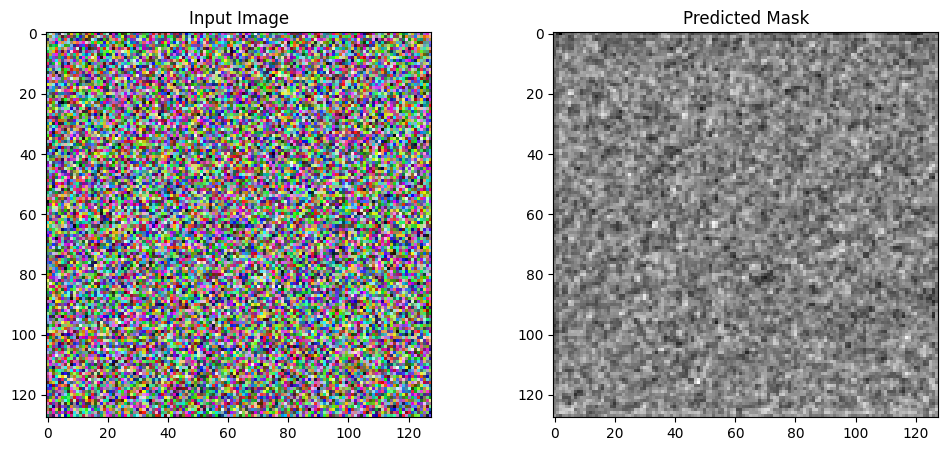

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Generate synthetic data (for demonstration purposes)
def generate_synthetic_data(num_samples=100, image_size=128):
    images = np.random.rand(num_samples, image_size, image_size, 3)
    masks = np.random.randint(0, 2, size=(num_samples, image_size, image_size))
    return images, masks

# Create a SegNet model
def segnet_model(input_size=(128, 128, 3), num_classes=1):
    model = keras.Sequential()

    # Encoder
    model.add(layers.Input(input_size))
    model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Decoder
    model.add(layers.UpSampling2D(size=(2, 2)))
    model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(num_classes, 1, activation='sigmoid', padding='valid'))

    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Generate synthetic data
images, masks = generate_synthetic_data()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Create and compile the SegNet model
model = segnet_model()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')

# Visualize some results
sample_image = X_val[0]
predicted_mask = model.predict(np.expand_dims(sample_image, axis=0))[0]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[:, :, 0], cmap='gray')
plt.title('Predicted Mask')

plt.show()

**Key Differences between U-net and SegNet:**

**Architectural Design:** SegNet uses an encoder-decoder design, while U-Net uses a U-shaped architecture with skip connections.

**Pooling vs. Concatenation:** SegNet relies on max-pooling indices for upsampling in the decoder, whereas U-Net concatenates features from the encoder with the decoder.

**Output Activation:** U-Net typically uses a sigmoid activation in the final layer for binary segmentation tasks, while SegNet uses a softmax or sigmoid activation, depending on the number of classes.

**Applications:** SegNet is known for fine segmentation tasks where preserving details is critical, while U-Net is more versatile and used in a wide range of image segmentation applications.